# Visualizações 

Fazer visualizações informativas (i.e. gráficos) é uma das mais importantes
tarefas na análise de dados.
- Pode ser parte do processo exploratório, por exemplo, para ajudar a identificar outliers ou transformações de dados necessárias, ou como uma forma de gerar ideias para modelos. 
- Ou ainda construir uma visualização interativa para a web pode ser o objetivo final. 

Python tem muitas bibliotecas complementares para fazer visualizações estáticas ou dinâmicas,
mas focaremos principalmente em **matplotlib** e bibliotecas que se baseiam nele.
- **matplotlib** é um pacote de plotagem projetado para criar gráficos (principalmente bidimensionais). 
- matplotlib suporta vários back-ends de GUI em todos sistemas operacionais e, adicionalmente, pode exportar visualizações para todos os formatos gráficos vetoriais e rasterizados (PDF, SVG, JPG, PNG, BMP, GIF, etc.). 
- Com o tempo, o **matplotlib** gerou uma série de kits de ferramentas complementares para visualização de dados que usam matplotlib para sua plotagem subjacente. 
    - Um deles é do **seaplot**, que exploraremos nesse notebook.
    
A maneira mais simples de gerar os gráficos no notebook é usar plotagem interativa. Para configurar isso, execute a seguinte instrução em no Jupyter notebook:

In [1]:
%matplotlib notebook

Com matplotlib, usamos a seguinte convenção de importação:

In [2]:
import matplotlib.pyplot as plt

Depois de executar %matplotlib notebook no Jupyter (ou simplesmente% matplotlib no IPython),
podemos tentar criar um enredo simples

In [3]:
import numpy as np

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


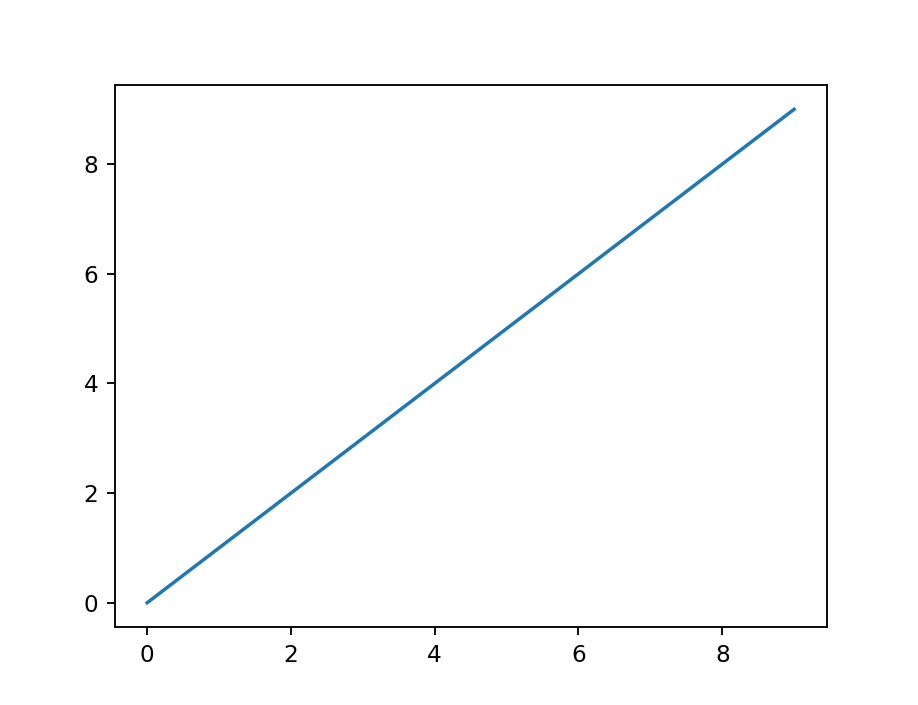

In [6]:
plt.plot(data)

Não há espaço suficiente aqui para fornecer uma visão abrangente das funcionalidades de **matplotlib**. 
- *O objetivo aqui é ensinar a se levantar e correr*.
- A [galeria e documentação matplotlib](https://matplotlib.org/) são os melhores locais para aprender recursos avançados.

## Figuras e subgráficos

Os gráficos em matplotlib residem em um objeto **Figure**. 
- Você pode criar uma nova figura com **plt.figure**:

<IPython.core.display.Javascript object>


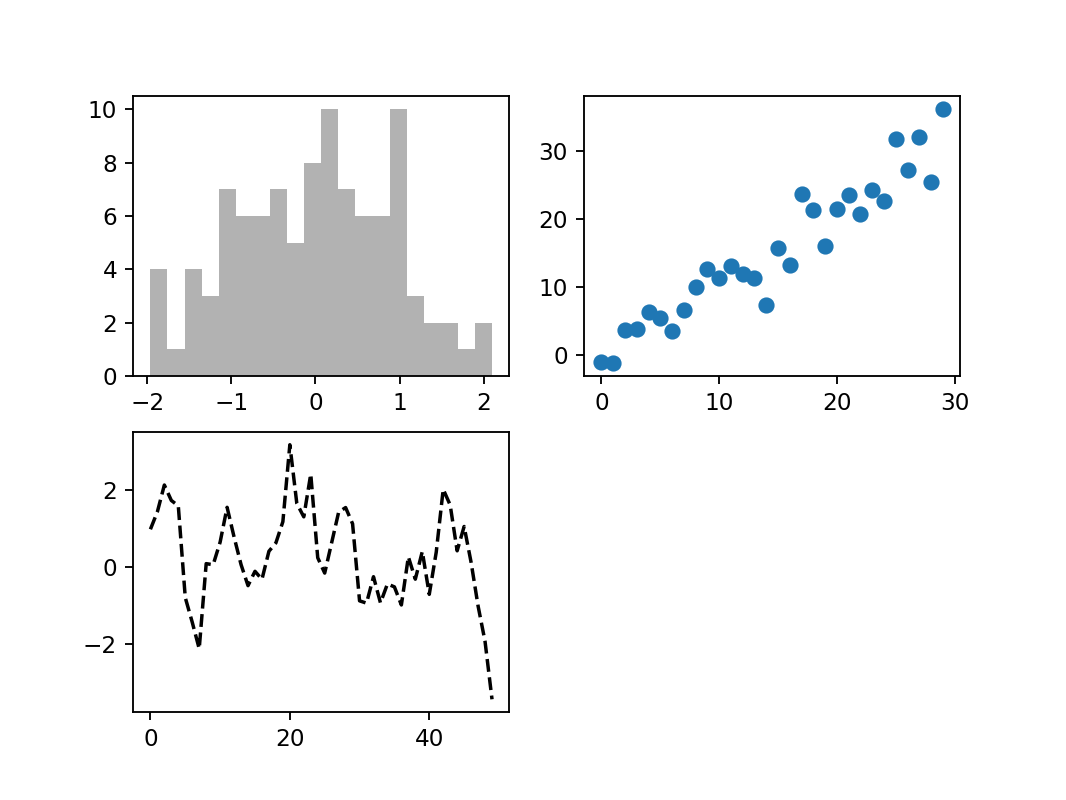

In [7]:
fig = plt.figure()

Você não pode fazer um gráfico com uma figura em branco. Você deve criar um ou mais gráficos usando **add_subplot**:

In [8]:
ax1 = fig.add_subplot(2, 2, 1)

Isso significa que a figura deve ser **2 × 2** (portanto, até quatro plotagens no total), e estamos selecionando o primeiro dos quatro subgráficos (numerados a partir de 1). Veja o que acontece se você criar os próximos dois subgráficos.

In [9]:
ax2 = fig.add_subplot(2, 2, 2)

In [10]:
ax3 = fig.add_subplot(2, 2, 3)

Quando você faz um comando de plotagem como plt.plot([1.5, 3.5, -2, 1.6]), o **matplotlib**
desenha na última figura e subgráfico usada (criando uma se necessário).

In [11]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

O argumento 'k--' é uma opção de estilo que diz ao **matplotlib** para traçar uma linha tracejada preta. 
- Os objetos retornados por **fig.add_subplot** aqui são objetos **AxesSubplot**, nos quais você pode plotar diretamente nos outros subgráficos vazios chamando o método de instância de um a um.

In [12]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [13]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Criar uma figura com uma grade de subgráficos é uma tarefa muito comum, então **matplotlib**
inclui um método de conveniência, **plt.subplots**, que cria uma nova figura e retorna
uma matriz **NumPy** contendo os objetos dos subgráfico criados:

<IPython.core.display.Javascript object>


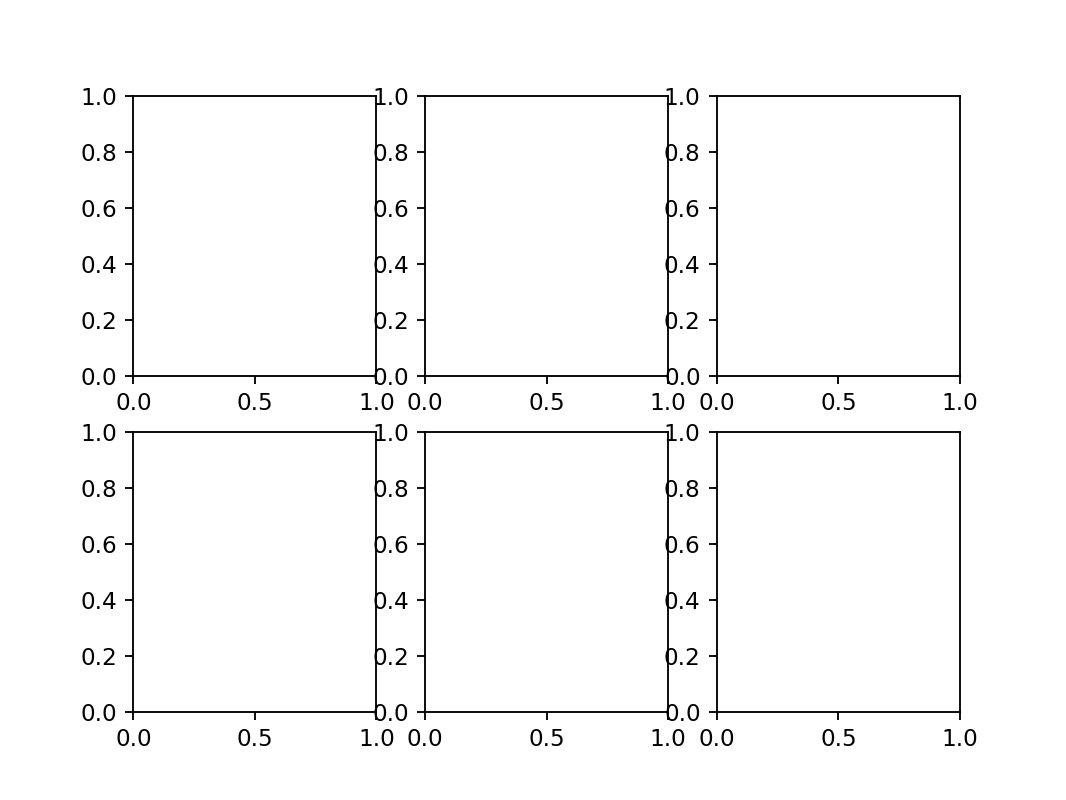

In [14]:
fig, axes = plt.subplots(2, 3)

In [15]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C93628B708>,
      dtype=object)

Isso é muito útil, pois a matriz de eixos (**axes**) pode ser facilmente indexada como um
array; por exemplo, **axes[0, 1]**. 
- Você também pode indicar que subgráficos devem ter os mesmos eixos x ou y usando **sharex** e **sharey**, respectivamente. 
    - Isso é especialmente útil quando você está comparando dados na mesma escala; 
    - caso contrário, o **matplotlib** cria escalas automáticase. 

https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/shared_axis_demo.html

### Ajustando o espaçamento em torno de subgráficos

Por padrão, o **matplotlib** deixa uma certa quantidade de preenchimento ao redor dos
subgráficos. Este espaçamento é todo especificado em relação ao altura e largura do gráfico, de modo que, se você redimensionar o gráfico de forma programática ou manualmente usando a janela GUI, o gráfico se ajustará dinamicamente. 
- Você pode alterar o espaçamento usando o método **subplots_adjust** nos objetos **Figure**.

*wspace* e *hspace* controlam a porcentagem da largura e altura da figura, respectivamente,
para usar como espaçamento entre os subgráficos. 
Aqui está um pequeno exemplo da redução do espaçamento a zero.

<IPython.core.display.Javascript object>


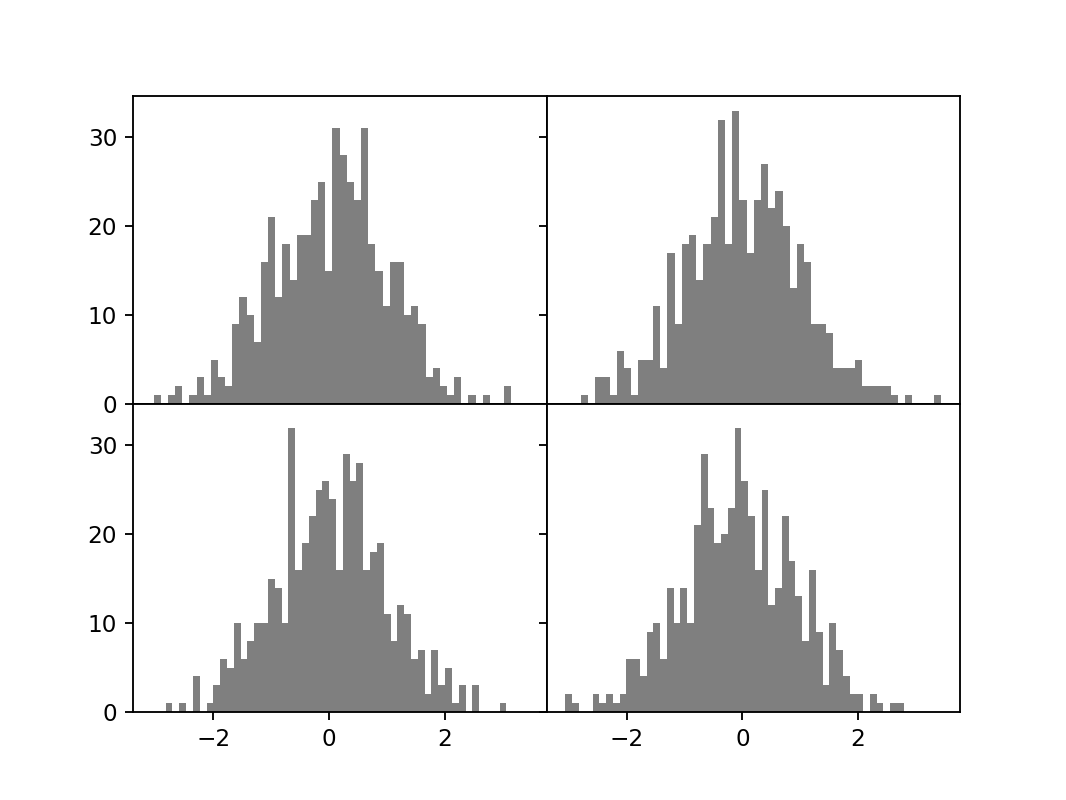

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Cores, marcadores e estilos de linha

A função **plot** do **matplotlib** aceita matrizes de coordenadas x e y e, opcionalmente, uma
string que indica a cor e o estilo da linha. Por exemplo, para plotar x versus y
com traços verdes, você executaria:

Esta maneira de especificar a cor e o estilo da linha em uma string é fornecida como uma conveniência; o mesmo comando poderia ser dado como:

ax.plot(x, y, linestyle='--', color='g')

- Há uma série de abreviações de cores fornecidas para cores comumente usadas, mas você pode usar qualquer cor no espectro especificando seu código hexadecimal (por exemplo, '#CECECE').

- Você pode ver o conjunto completo de estilos de linha olhando a docstring de plot:

In [17]:
plt.plot?

Os gráficos em linha também podem ter marcadores para destacar alguns pontos de dados.
- O marcador pode ser parte da string de estilo, que deve ter a cor seguida pelo tipo de marcador e estilo de linha.

In [18]:
from numpy.random import randn

<IPython.core.display.Javascript object>


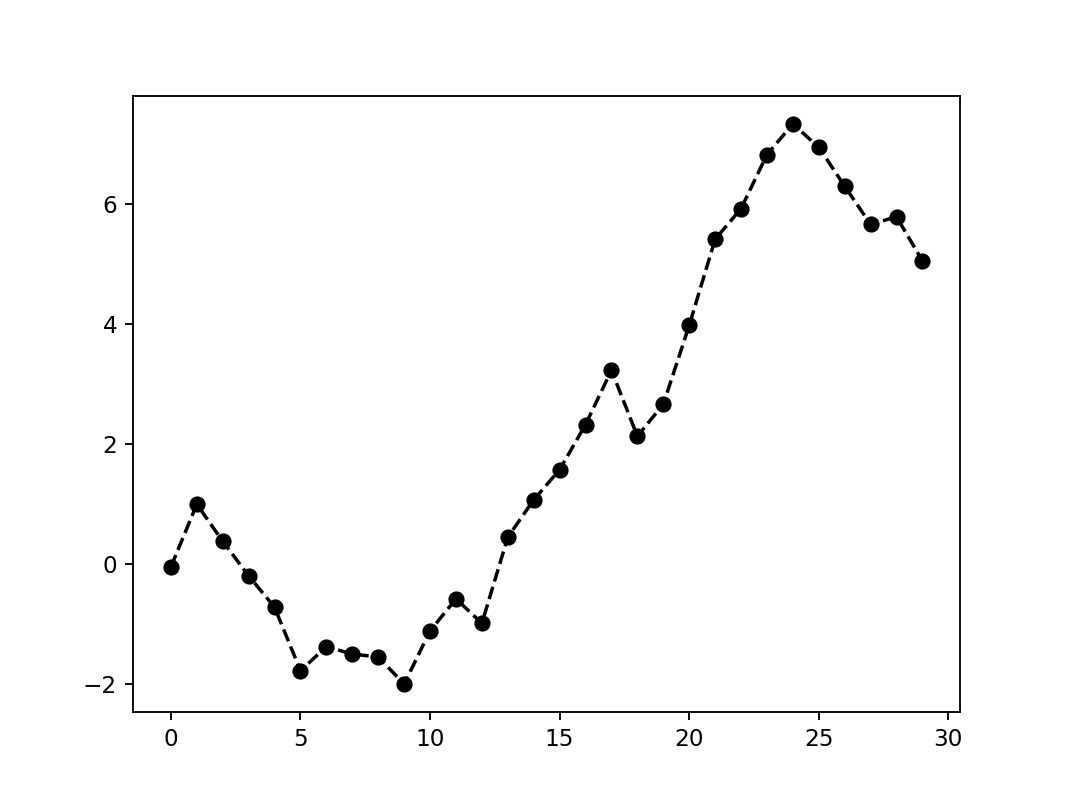

In [19]:
fig = plt.figure()

In [20]:
plt.plot(randn(30).cumsum(), 'ko--')

Para gráficos de linha, você notará que os pontos subsequentes são interpolados linearmente por
padrão. Isso pode ser alterado com a opção de estilo de **drawstyle**

<IPython.core.display.Javascript object>


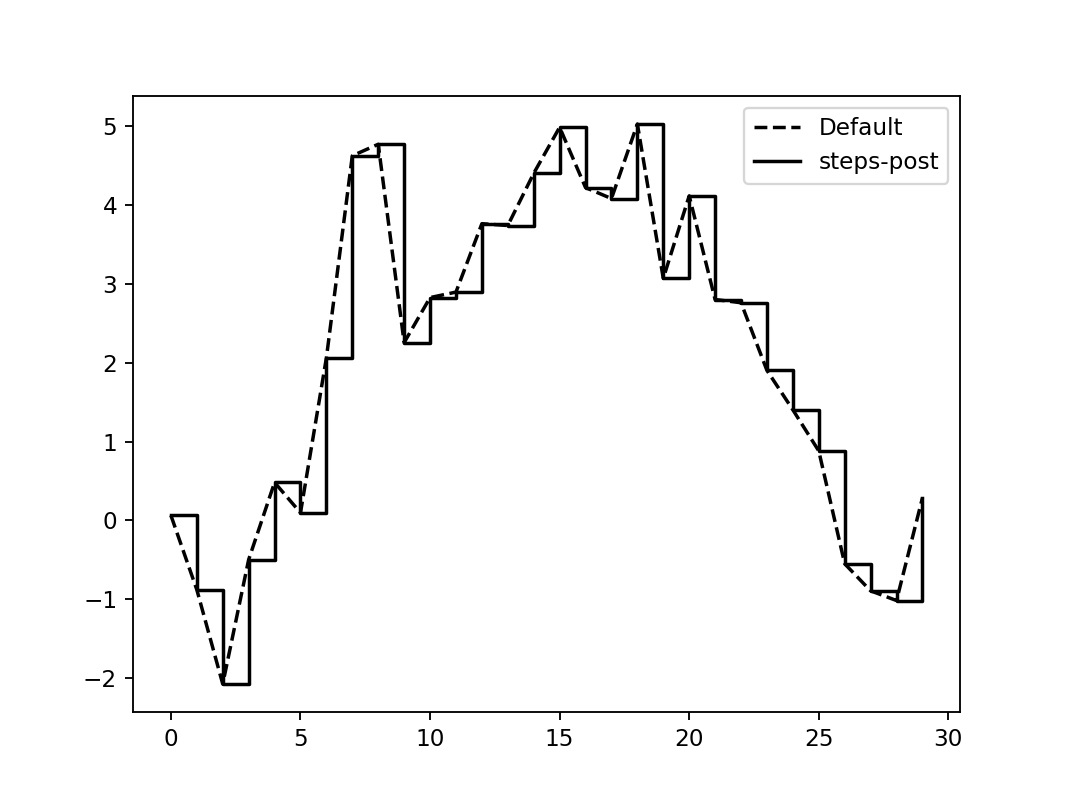

In [21]:
fig = plt.figure()

In [22]:
data = np.random.randn(30).cumsum()

In [23]:
plt.plot(data, 'k--', label='Default')

In [24]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [25]:
plt.legend(loc='best')

Aqui, como passamos os rótulo como argumentos para **plot**, podemos criar uma legenda para identificar cada linha usando **plt.legend**. 

### *Ticks*, rótulos e legendas

Para a maioria dos tipos de decoração de gráficos, existem duas maneiras principais de fazer as coisas: 
- usando o interface **pyplot** (ou seja, **matplotlib.pyplot**) e outros objetos nativos do **matplotlib**.
- A interface **pyplot**, projetada para uso interativo, consiste em métodos como **xlim**, **xticks** e **xticklabels**. 
- Estes controlam o intervalo do gráfico, locais de ticks e rótulos de escala, respectivamente. Eles podem ser usados de duas maneiras:
    - Chamado sem argumentos, retorna o valor do parâmetro atual (por exemplo, **plt.xlim()** retorna o intervalo de plotagem do eixo x atual)
    - Chamado com parâmetros, define o valor do parâmetro (por exemplo, **plt.xlim([0, 10]**), define o eixo x varia de 0 a 10).

Esses métodos atuam no **AxesSubplot** ativo ou criado mais recentemente. 
- Cada um deles correspondem a dois métodos no próprio objeto de subgráfico; 
    - no caso de *xlim* eles são **ax.get_xlim** e **ax.set_xlim**. 

### Definindo o título, rótulos de eixo, ticks e ticklabels

Para ilustrar a personalização dos eixos, vamos criar uma figura simples e representar um gráfico de caminhada aleatória

<IPython.core.display.Javascript object>


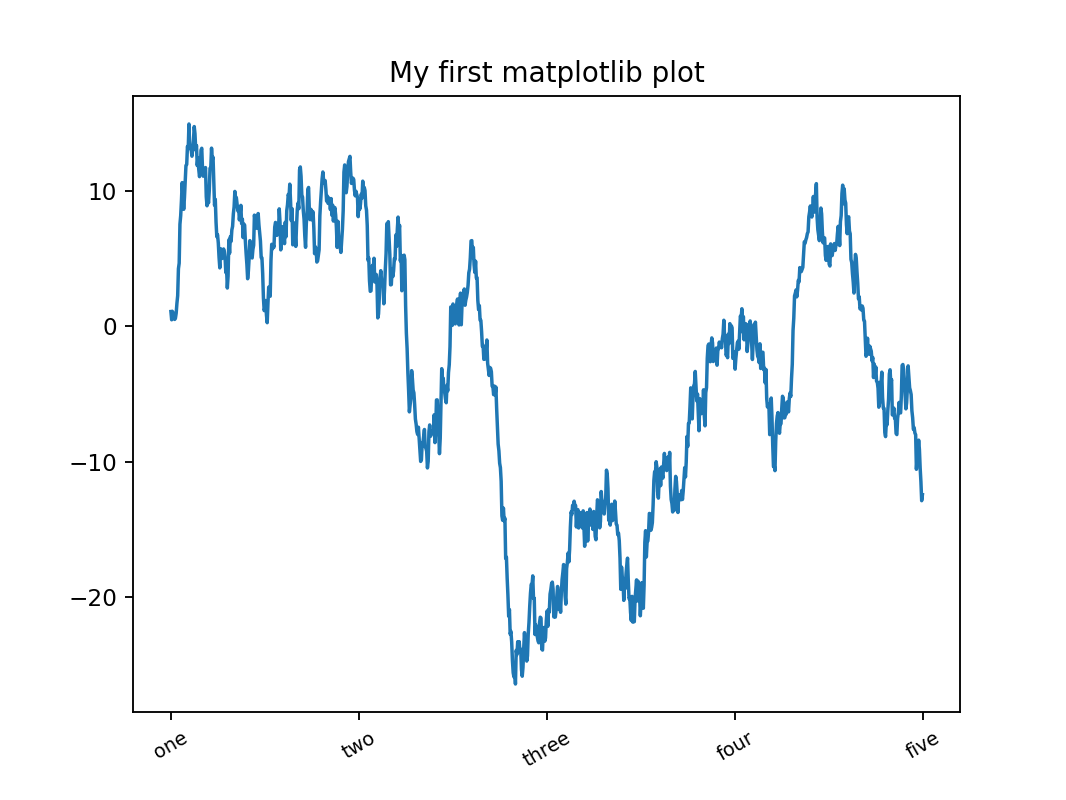

In [26]:
fig = plt.figure()

In [27]:
ax = fig.add_subplot(1, 1, 1)

In [28]:
ax.plot(np.random.randn(1000).cumsum())

Para alterar as marcações do eixo x, é mais fácil usar **set_xticks** e **set_xticklabels**. O primeiro instrui **matplotlib** onde colocar os ticks ao longo do intervalo de dados; por padrão, esses locais também serão os rótulos. Mas podemos definir quaisquer outros valores como rótulos usando **set_xticklabels**

In [29]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [30]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

A opção de rotação define os rótulos de escala x em uma rotação de 30 graus. Por último, **set_xlabel** dá um nome ao eixo x e **set_title** o título do subgráfico.

In [31]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1, 'My first matplotlib plot')

Modificar o eixo y consiste no mesmo processo, substituindo y por x acima.
A classe de eixos tem um método definido que permite a configuração em lote das propriedades do gráfico. Do exemplo anterior, também poderíamos ter escrito:

### Adicionando legendas

As legendas são outro elemento crítico para identificar os elementos do gráfico. Há um par
de maneiras de adicionar um. O mais fácil é passar o argumento **label** ao adicionar cada peça
do gráfico:

In [32]:
from numpy.random import randn

<IPython.core.display.Javascript object>


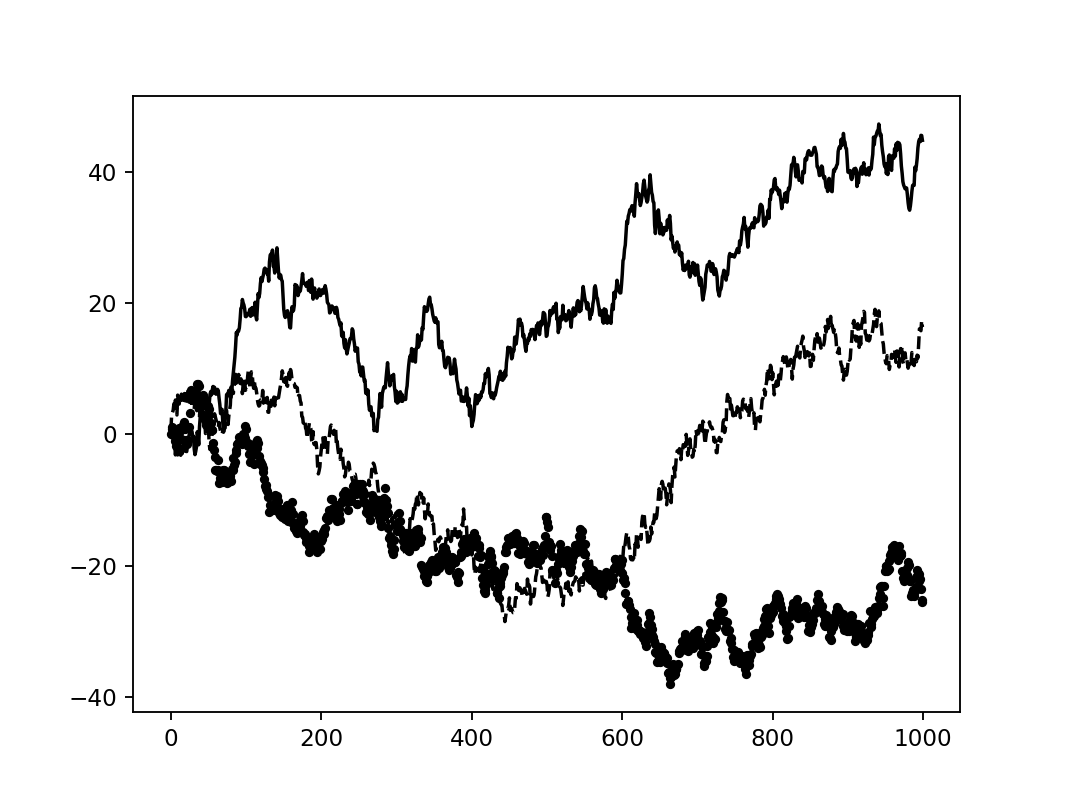

In [33]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [34]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [35]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [36]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

Depois de fazer isso, você pode chamar **ax.legend()** ou **plt.legend()** para criar automaticamente uma legenda. O método **legend** possui várias outras opções para o argumento location **loc**. Veja o docstring (com **ax.legend?**) para mais informações.

O **loc** diz ao **matplotlib** onde colocar o gráfico. Se você não for exigente, 'best' é um bom opção, uma vez que irá escolher um local que fica mais afastado. Para excluir um ou mais
elementos da legenda, não passe rótulo ou rótulo = **'_ nolegend_'**.

### Anotações e desenho em um subgráfico

Além dos tipos de gráfico padrão, você pode querer desenhar suas próprias anotações nos gráfico, que pode consistir em texto, setas ou outras formas. 
- Você pode adicionar anotações e texto usando as funções de **text**, **arrow** e **annotate**. **text** desenha texto em dado coordenadas **(x, y)** no gráfico com estilo personalizado opcional:

<IPython.core.display.Javascript object>


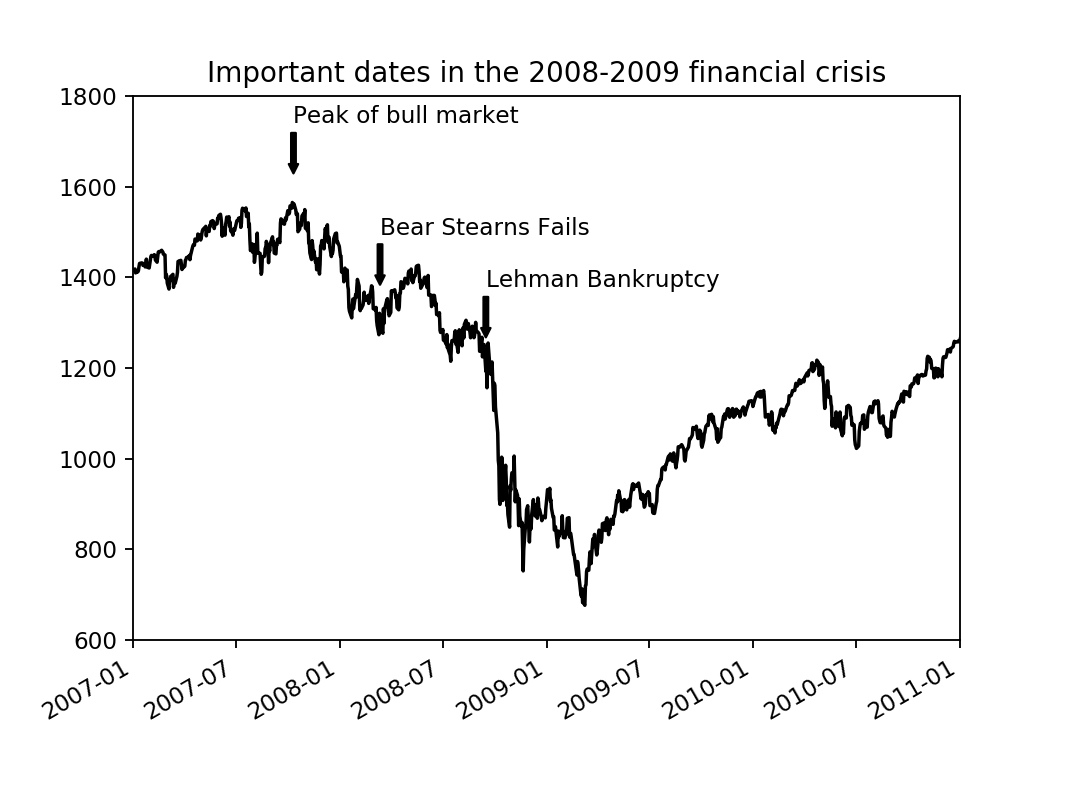

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [37]:
from datetime import datetime
import pandas as pd
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
        horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Existem alguns pontos importantes a serem destacados neste gráfico: o método **ax.annotate**
 pode desenhar rótulos nas coordenadas x e y indicadas. 
 - Usamos os métodos **set_xlim** **set_ylim** para definir manualmente os limites iniciais e finais para o gráfico em vez de usar o padrão de **matplotlib**. 
- Por último, **ax.set_title** adiciona um título principal ao gráfico.

Desenhar formas requer mais cuidado. Matplotlib tem objetos que representam muitas
formas comuns, chamadas de *patches*. Alguns deles, como retângulo e círculo, são
encontrado em **matplotlib.pyplot**, mas o conjunto completo está localizado em **matplotlib.patches**.

<IPython.core.display.Javascript object>


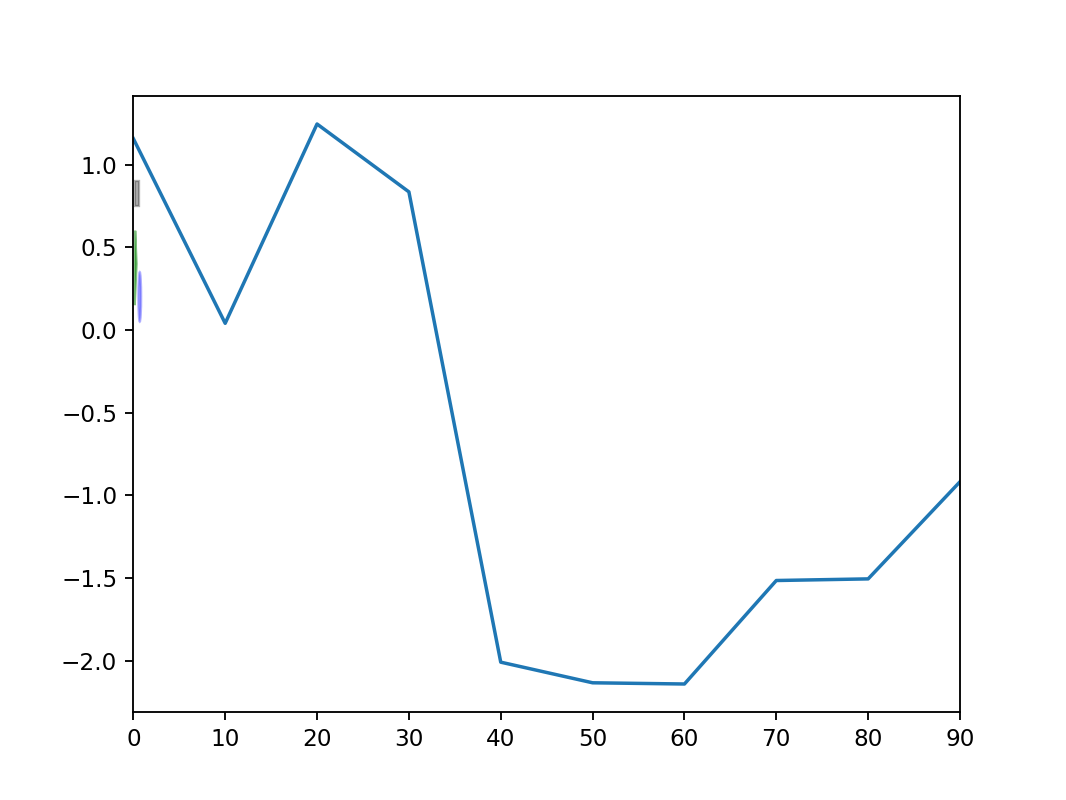

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Salvando plotagens para arquivo

Você pode salvar a figura ativa em um arquivo usando **plt.savefig**. Este método é equivalente ao método de instância **savefig** do objeto de figura. Por exemplo, para salvar uma versão SVG de uma figura, você só precisa digitar:

In [23]:
plt.savefig('figpath.svg')

O tipo de arquivo é inferido da extensão do arquivo. 
- Então, se você usou .pdf, obteria um PDF. 
- Existem algumas opções importantes para publicação de gráficos:
    - **dpi**, que controla a resolução de pontos por polegada, 
    - e **bbox_inches**, que pode cortar os espaços em branco ao redor da figura real. 
    
Para obter o mesmo gráfico que um PNG com espaços em branco mínimos ao redor do gráfico e em 400 DPI, você faria:

In [24]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

Opções de *savefigs*:

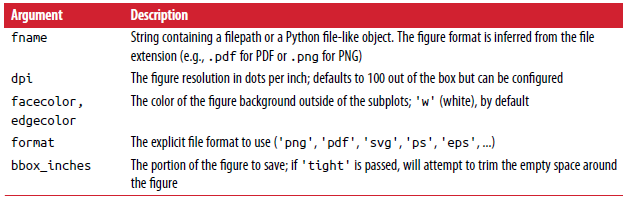

#### Configuração do matplotlib

O **matplotlib** vem configurado com esquemas de cores e padrões que são voltados principalmente para preparar figuras para publicação. 
- Felizmente, quase todos os padrões o comportamento pode ser personalizado por meio de um amplo conjunto de parâmetros globais que regem a figura como tamanho, espaçamento do subgráfico, cores, tamanhos de fonte, estilos de grade e assim por diante. 
- Uma maneira de modificar a configuração programaticamente do Python é usar o método **rc**; por exemplo, para definir o tamanho da figura global padrão para **10 × 10**, você pode inserir:

O primeiro argumento para **rc** é o componente que você deseja personalizar, como **'figure'**, **'axes'**, **'xtick'**, **'ytick'**, **'grid'**, **'legend'**, entre outros. 

Depois disso, pode seguir uma sequência de argumentos de palavras-chave indicando os novos parâmetros. Uma maneira fácil de escrever as opções em seu programa é usando um dicionário.

## Plotando com Pandas e Seaborn

O **matplotlib** pode ser uma ferramenta de baixo nível. Você monta um gráfico a partir de seus componentes básicos: 
a exibição de dados (ou seja, o tipo de gráfico: linha, barra, caixa, dispersão, contorno, etc.), legenda, título, rótulos de escala e outras anotações.

Nos **Pandas**, podemos ter várias colunas de dados, junto com rótulos de linha e coluna.
- O próprio pandas tem métodos integrados que simplificam a criação de visualizações a partir de objetos **DataFrame** e **Series**. 

- Outra biblioteca é a **Seaborn**, uma biblioteca de gráficos estatísticosque simplifica a criação de muitas visualizações comuns.

#### Gráficos de linha

**Series** e **DataFrame** têm, cada um, um atributo de plotagem para fazer alguns tipos básicos de plotagem. Por padrão, **plot()** cria gráficos de linha

fig = plt.figure()

In [39]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [40]:
s.plot()

O índice do objeto **Series** é passado para o **matplotlib** para plotagem no eixo x, embora você pode desabilitar isso passando **use_index = False**. 
- As marcações e limites do eixo x podem ser ajustados com as opções **xticks** e **xlim** e eixo y respectivamente com **yticks** e **ylim**.

Argumentos do método *plot* de **Series**

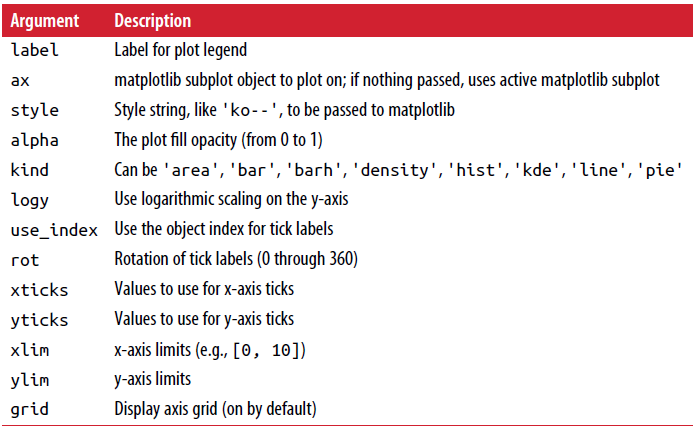

O método plot do DataFrame plota cada uma de suas colunas como uma linha diferente na mesma
subgráfico, criando uma legenda automaticamente

<IPython.core.display.Javascript object>


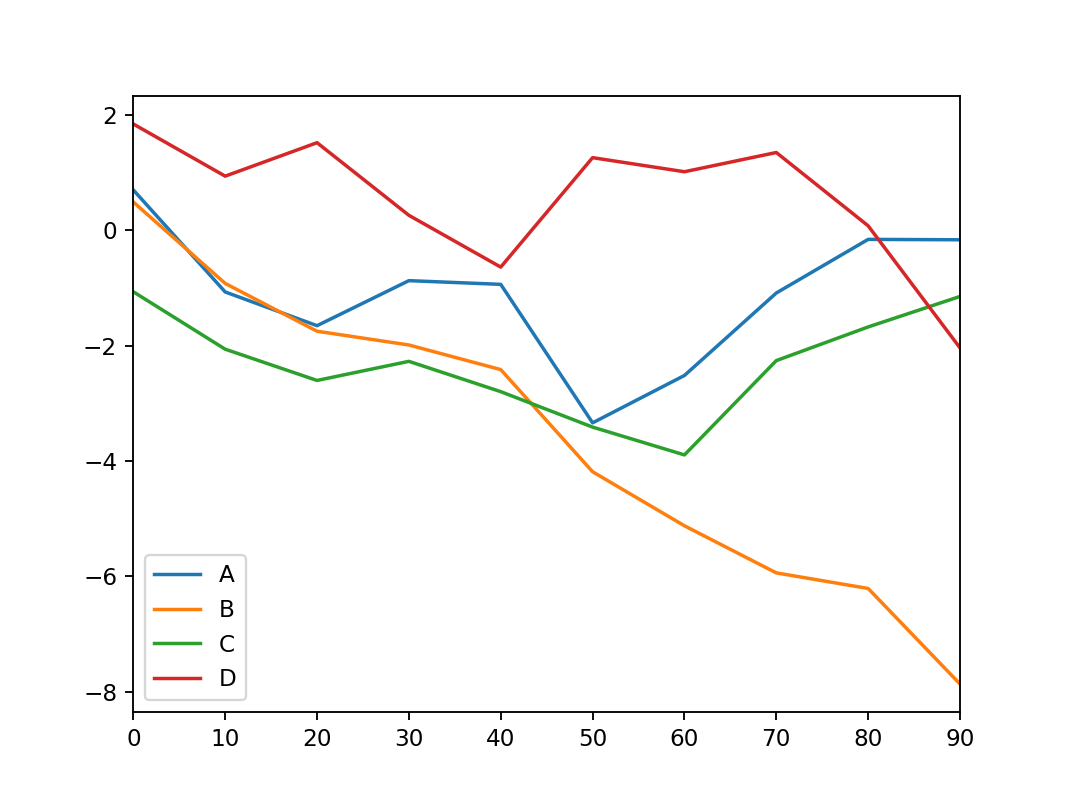

In [41]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10))
df.plot()

**DataFrame** tem uma série de opções, permitindo alguma flexibilidade com a forma como as colunas são manuseados; por exemplo, se deve traçá-los todos no mesmo subgráfico ou criar
subgráficos separados.

Argumentos específicos de **DataFrame**

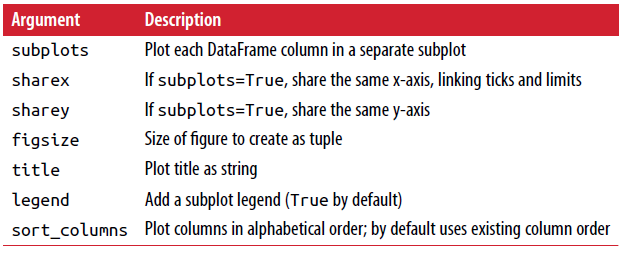

#### Figuras de barra

**plot.bar()** e o **plot.barh()** fazem plotagens de barra vertical e horizontal, respectivamente.
- Neste caso, o índice de **Series** ou de **DataFrame** será usado como x (bar) ou y (barh) *ticks*.

<IPython.core.display.Javascript object>


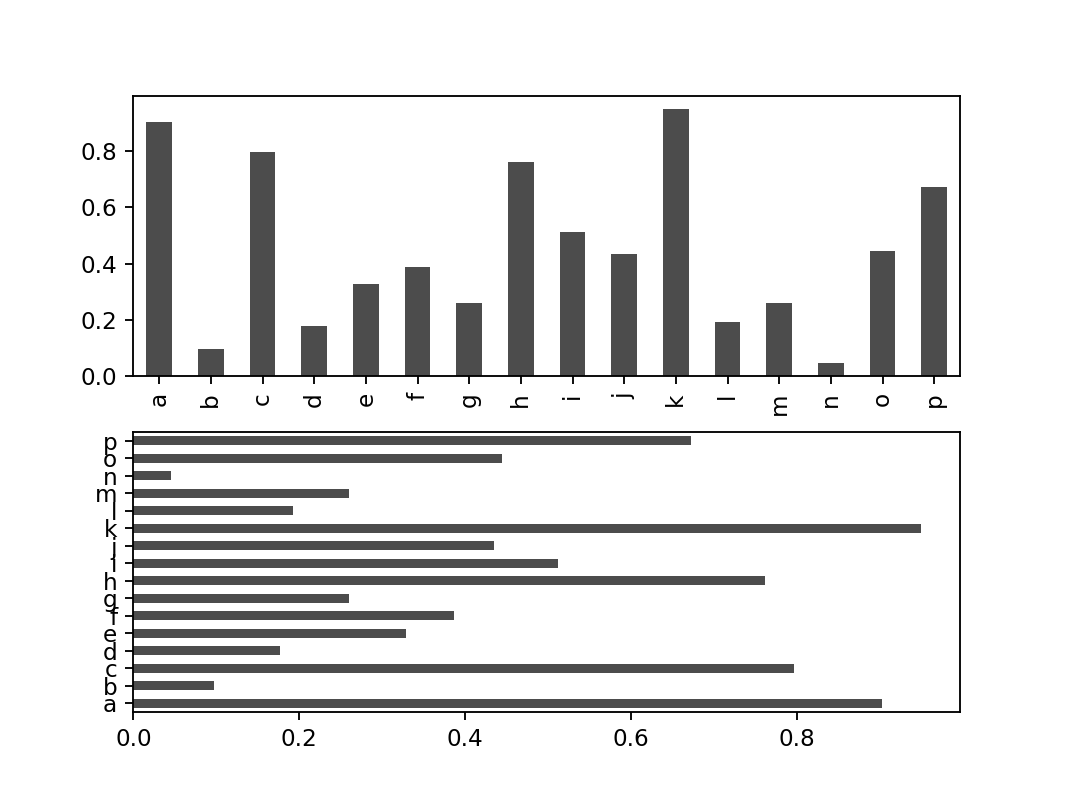

In [42]:
fig, axes = plt.subplots(2, 1)

In [43]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [44]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [45]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

As opções **color = 'k'** e **alpha = 0.7** definem a cor dos gráficos para preto e usam parcial transparência.

Com um **DataFrame**, os gráficos de barra agrupam os valores em cada linha em um grupo em barras,
lado a lado, para cada valor.

In [47]:
df = pd.DataFrame(np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [48]:
df

Genus,A,B,C,D
one,0.210934,0.983997,0.241879,0.828893
two,0.561816,0.730655,0.353071,0.271490
three,0.726618,0.110523,0.698738,0.377916
four,0.100993,0.702200,0.567052,0.467529
five,0.997025,0.366717,0.433549,0.981719
six,0.348013,0.296234,0.446747,0.805508


<IPython.core.display.Javascript object>


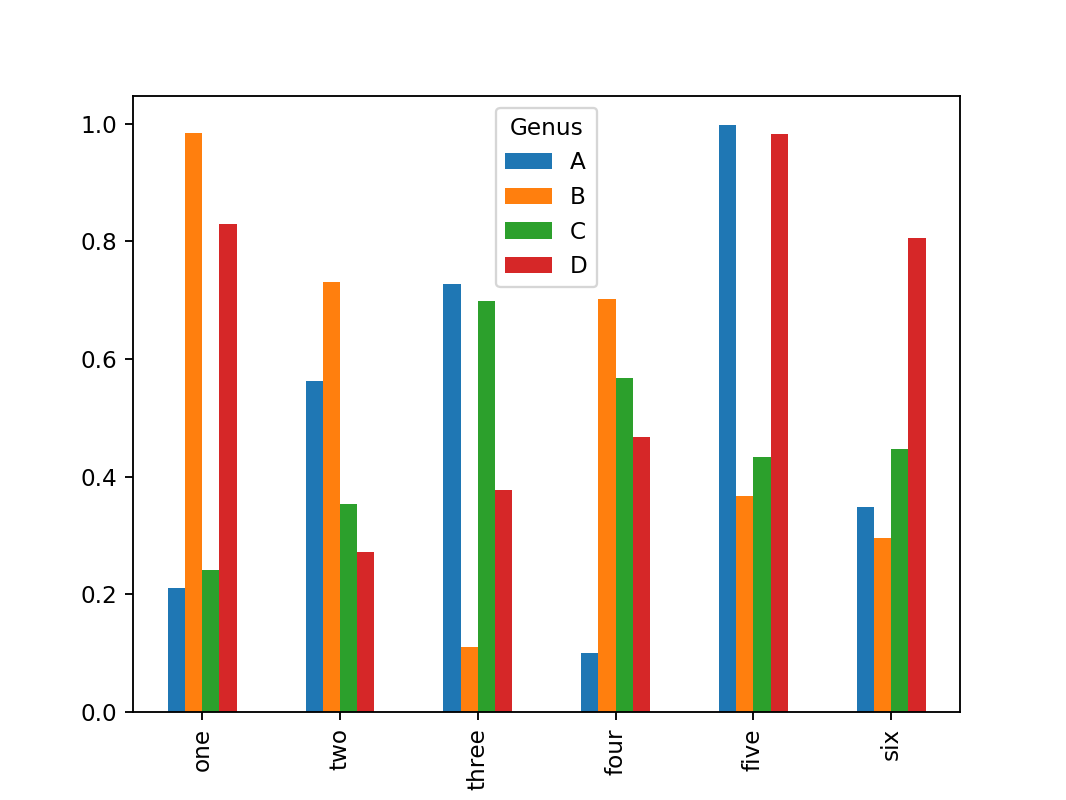

In [49]:
df.plot.bar()

Criamos gráficos de barras empilhadas a partir de um **DataFrame** passando **stacked = True**, resultando em o valor em cada linha sendo empilhado.

<IPython.core.display.Javascript object>


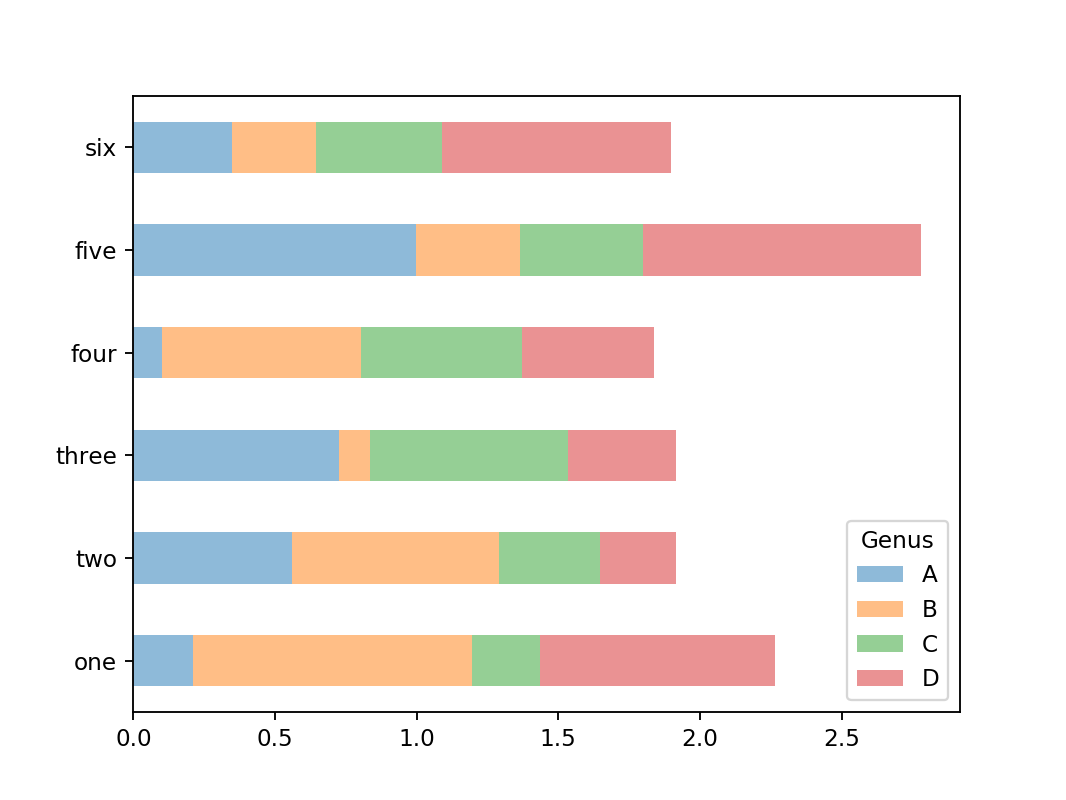

In [50]:
df.plot.barh(stacked=True, alpha=0.5)

In [51]:
tips = pd.read_csv('datasets/tips.csv')

Suponha que quiséssemos fazer um gráfico de barras empilhadas mostrando a porcentagem dos dados para cada tamanho de grupo de pessoas por dia. 
- Façamos uma tabulação cruzada por dia e número de pessoas por grupo:

In [52]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [53]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [54]:
party_counts = party_counts.loc[:, 2:5]

In [55]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Em seguida, normalize de modo que cada linha some 1 e faça o gráfico

In [56]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [57]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


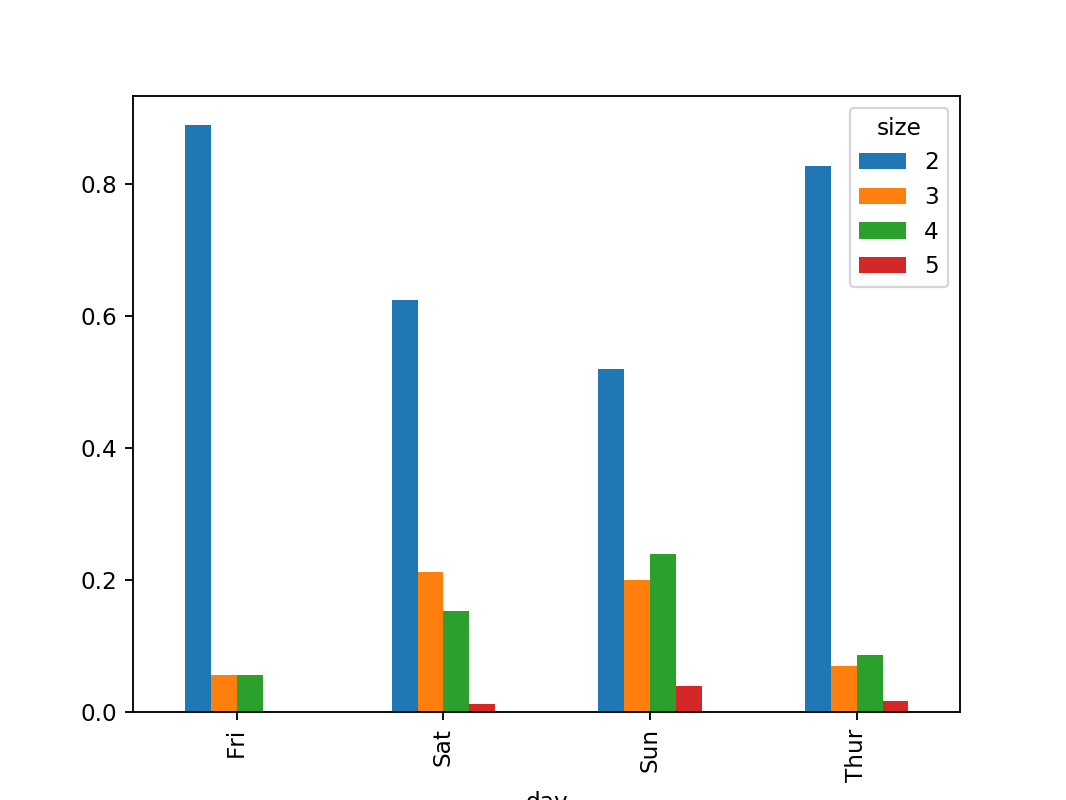

In [58]:
party_pcts.plot.bar()

Você pode ver que o tamanho dos grupos parece aumentar no fim de semana neste conjunto de dados.

Com dados que requerem agregação ou resumo antes de fazer um gráfico, usando o pacote **seaborn**  pode tornar as coisas muito mais simples. 
- Vejamos como fica a porcentagem de gorjeta por dia com o **seaborn**

In [59]:
import seaborn as sns

In [60]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [61]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


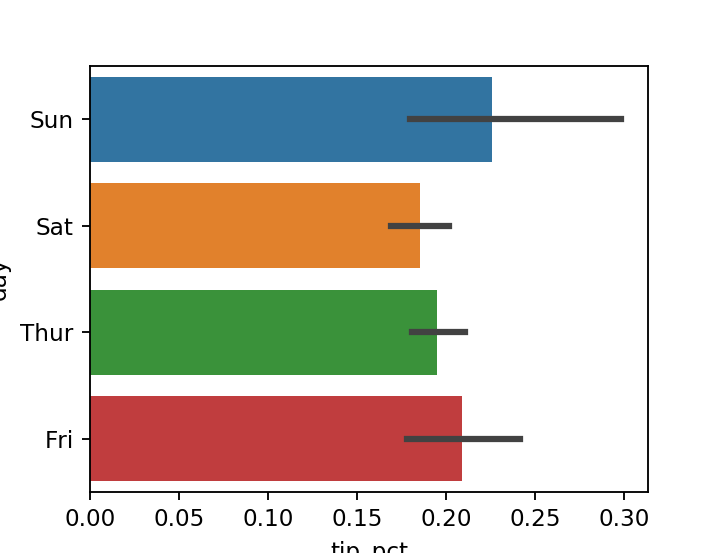

In [62]:
fig = plt.figure()

In [63]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Funções de plotagem no **seaborn** usam um argumento de dados, que pode ser um **pandas DataFrame**. Os outros argumentos referem-se aos nomes das colunas. 
- Como existem várias observações para cada dia, as barras são o valor médio de **tip_pct**. 
- As linhas pretas desenhadas nas barras representam o intervalo de confiança de 95% (isso pode ser configurado por meio de argumentos opcionais).

**seaborn.barplot** tem uma opção **hue** que nos permite dividir uma categoria adicional

<IPython.core.display.Javascript object>


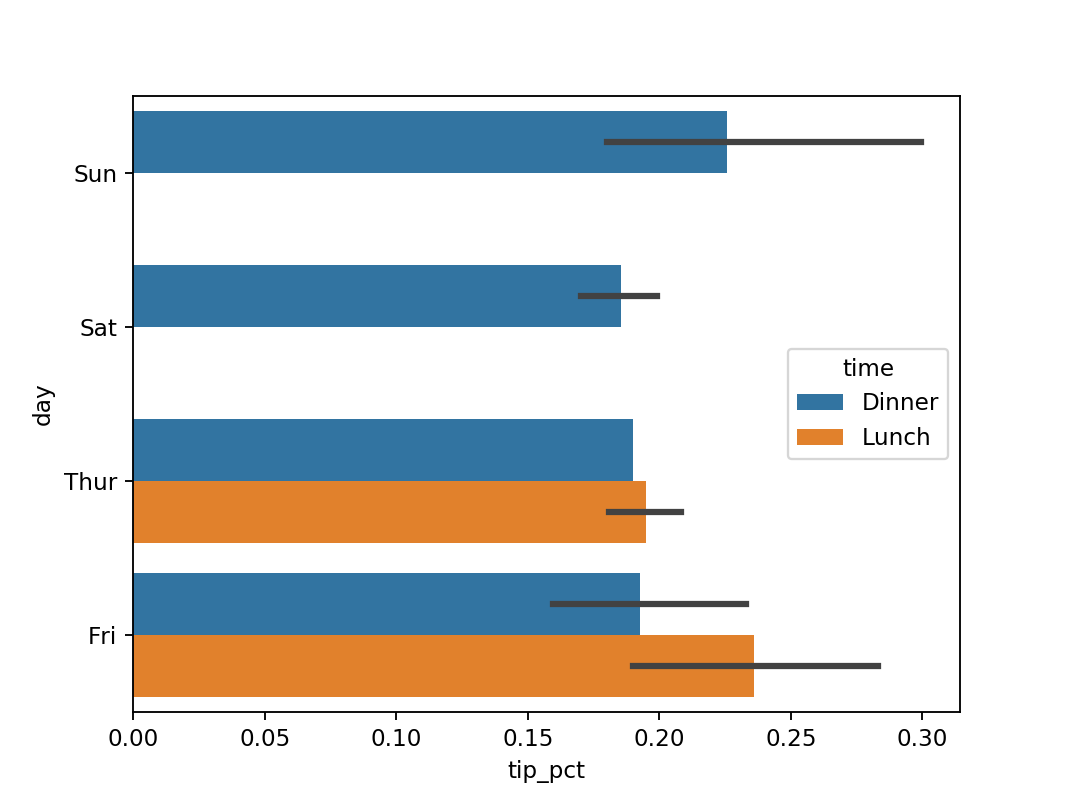

In [64]:
fig = plt.figure()

In [65]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

## Histogramas e gráficos de densidade



Um histograma é um tipo de gráfico de barra que fornece uma exibição discretizada da frequência dos valores.
- Os pontos de dados são divididos em caixas discretos com espaçamento uniforme e o número de dados pontos em cada caixa são plotados. 
Usando o conjunto de dados de gorjetas, podemos fazer um histograma das porcentagens de gorjeta da conta total usando o método **plot.hist**.

<IPython.core.display.Javascript object>


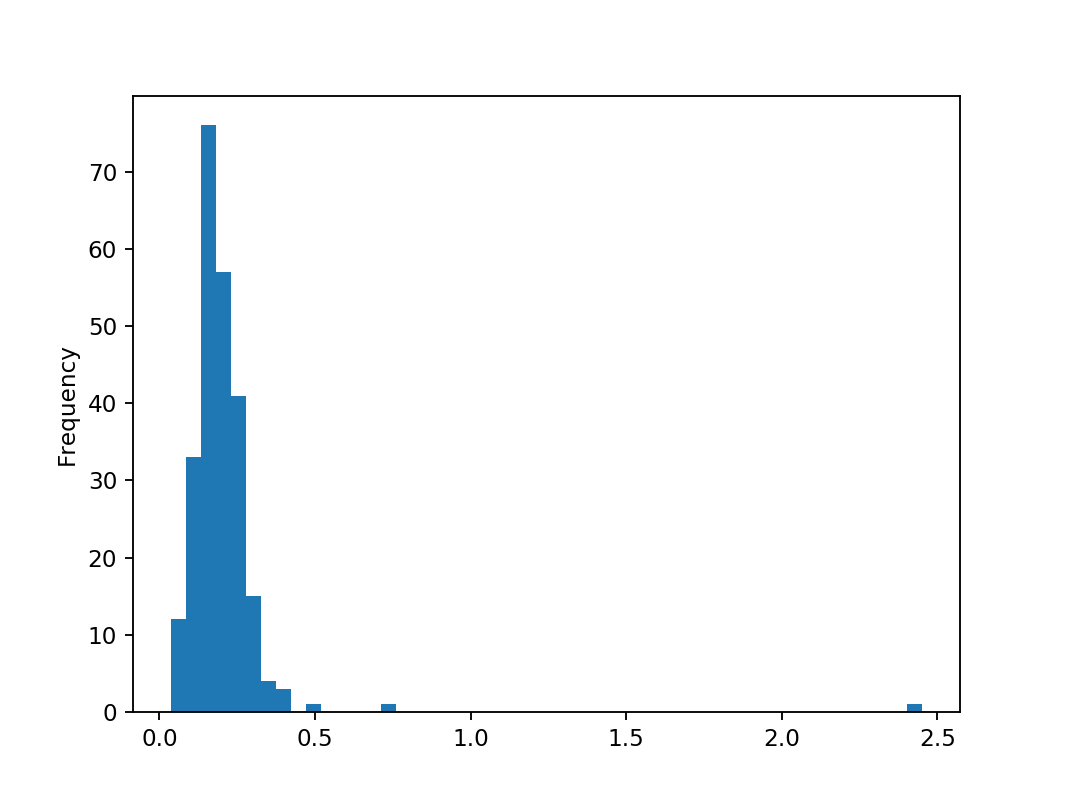

In [66]:
fig = plt.figure()

In [67]:
In [92]: tips['tip_pct'].plot.hist(bins=50)

Um tipo de gráfico relacionado é um gráfico de densidade, que é formado pelo cálculo de uma estimativa de uma distribuição de probabilidade contínua que pode ter gerado os dados observados.
- O procedimento usual é aproximar esta distribuição como uma mistura de *kernels* - isto é, distribuições mais simples, como a distribuição normal. 
- Assim, os gráficos de densidade também são conhecidos como gráficos de estimativa de densidade do kernel (KDE). 
- O uso de **plot.kde** cria um gráfico de densidade usando a estimativa convencional de mistura de normais (Gaussianas).

<IPython.core.display.Javascript object>


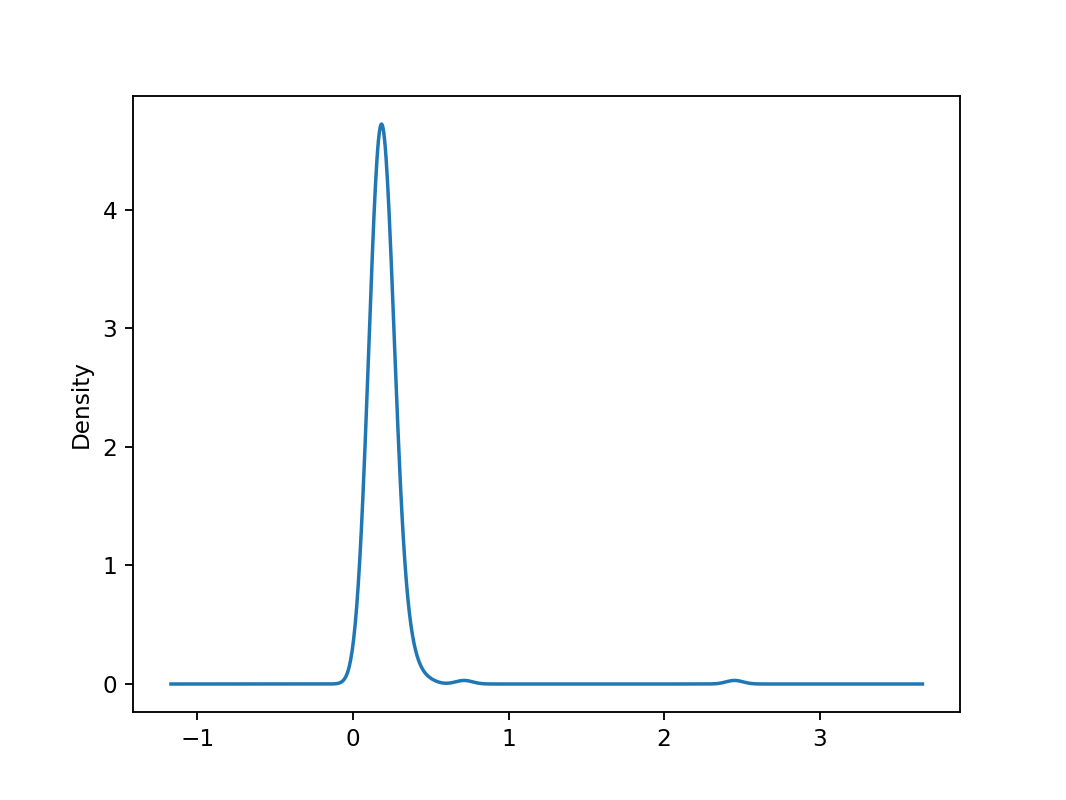

In [68]:
fig = plt.figure()

In [69]:
tips['tip_pct'].plot.density()

Seaborn torna histogramas e gráficos de densidade ainda mais fáceis por meio de seu método **distplot**, que pode traçar um histograma e uma estimativa de densidade contínua simultaneamente. 
- Como exemplo, considere uma distribuição bimodal que consiste em amostragens de duas distribuições normais diferentes.

In [70]:
comp1 = np.random.normal(0, 1, size=200)

In [71]:
comp2 = np.random.normal(10, 2, size=200)

In [72]:
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


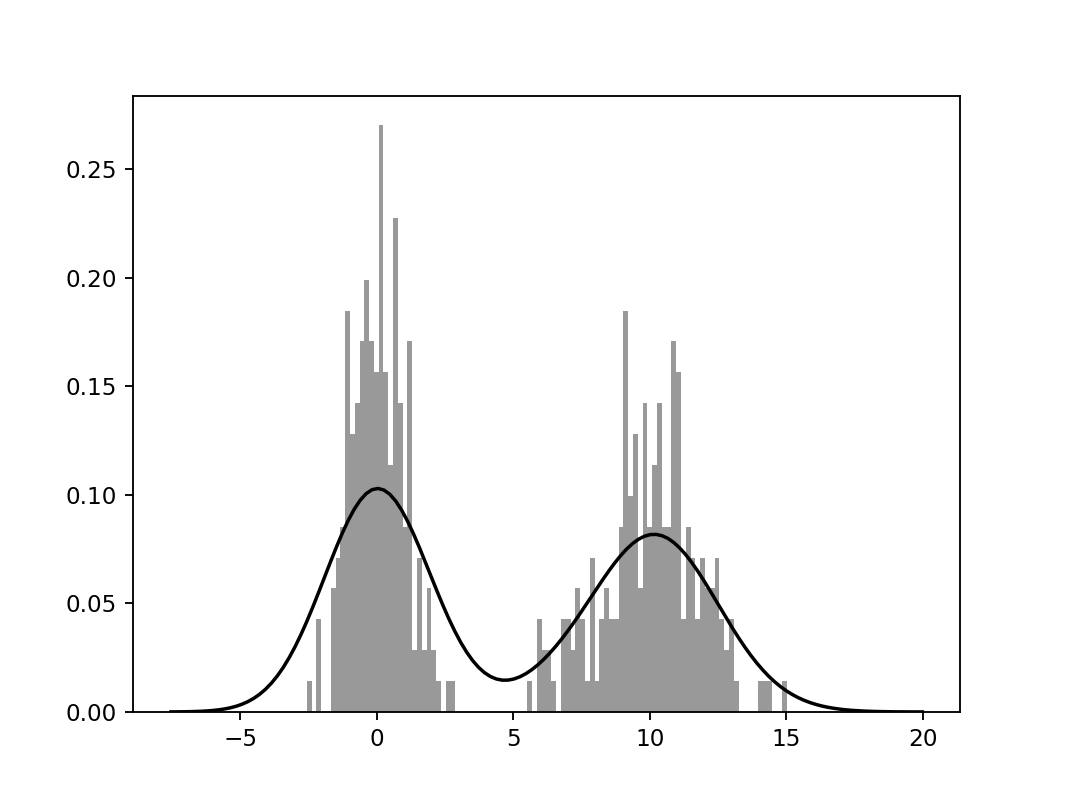

In [73]:
fig = plt.figure()

In [74]:
sns.distplot(values, bins=100, color='k')

## Gráficos de dispersão ou pontos

Gráficos de pontos ou gráficos de dispersão podem ser uma maneira útil de examinar a relação entre duas séries de dados unidimensionais. 
- Por exemplo, aqui carregamos o conjunto de dados [**macrodata**](https://www.statsmodels.org/devel/datasets/generated/macrodata.html), do [projeto statsmodel](https://www.statsmodels.org/). selecionamos algumas variáveis e calculamos as diferenças de registro:

In [75]:
macro = pd.read_csv('datasets/macrodata.csv')

In [76]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [77]:
trans_data = np.log(data).diff().dropna()

In [78]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


Podemos então usar o método **regplot** do **seaborn**, para criar um gráfico de dispersão e a linha de regressão.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


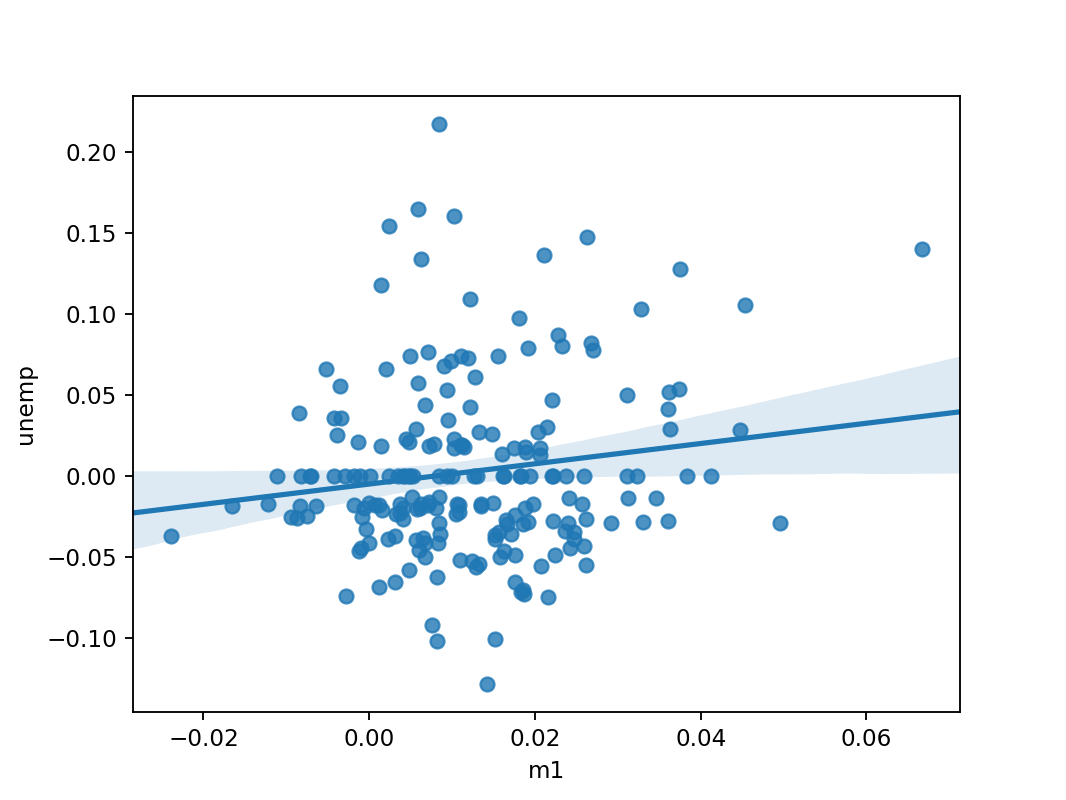

In [80]:
fig = plt.figure()

In [81]:
sns.regplot('m1', 'unemp', data=trans_data)

Na análise exploratória de dados, é útil ser capaz de olhar para todos os gráficos de dispersão  (par a par) entre um grupo de variáveis; 
- isso é conhecido como um gráfico de pares ou matriz de gráfico de dispersão. 

Traçar esse gráfico do zero dá um pouco de trabalho, então o **seabor** tem uma função conveniente, chamada **pairplot**, que suporta histogramas ou estimativas de densidade de cada variável ao longo da diagonal principal.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


<IPython.core.display.Javascript object>


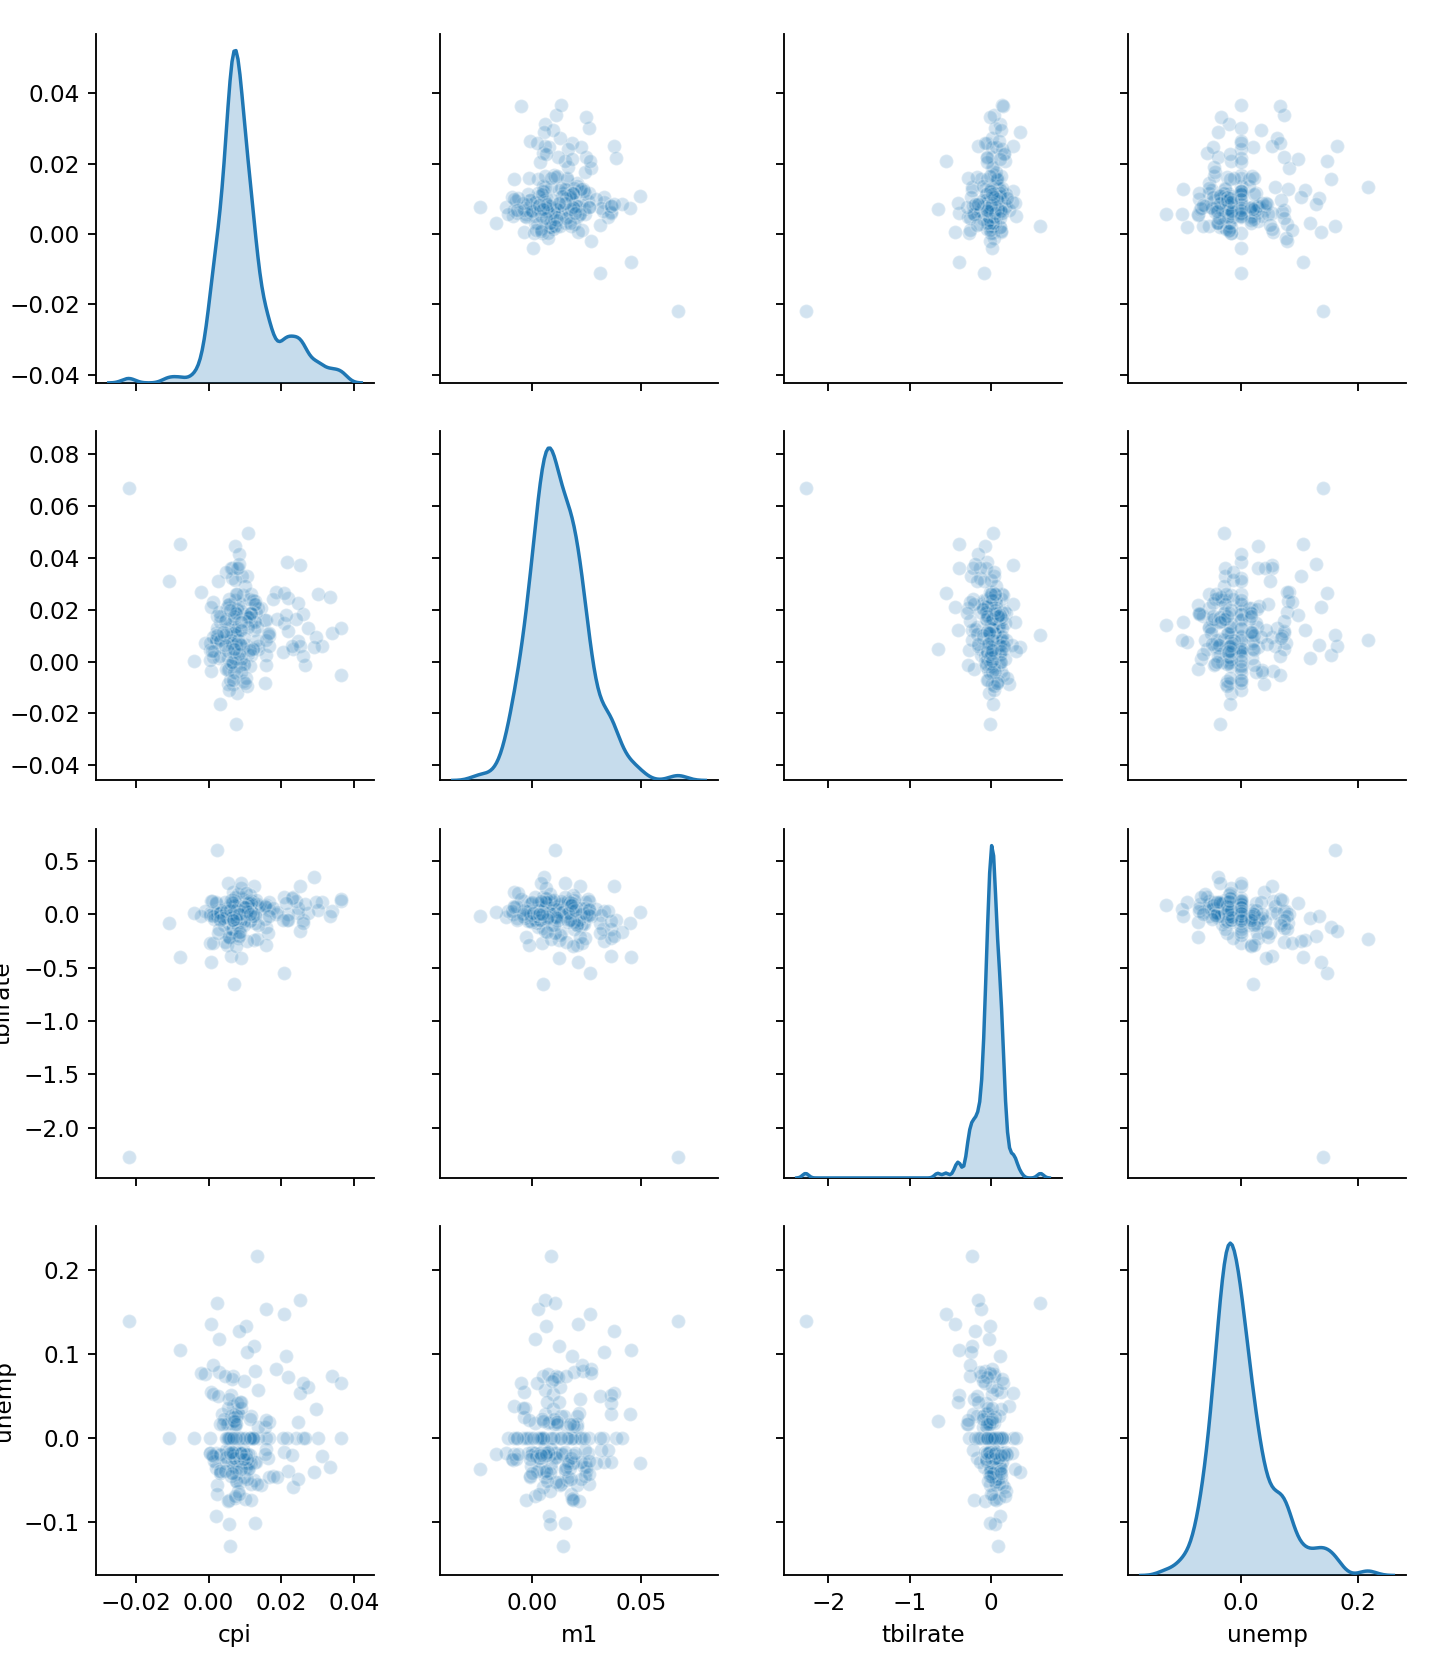

In [82]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

Note o argumento **plot_kws**, que permite passar opções para as chamadas de plotagem individuais nos elementos fora da diagonal - *Confira a docstring de seaborn.pairplot*.

## Grades de facetas e dados categóricos

E quanto aos conjuntos de dados onde temos dimensões de agrupamento adicionais? 
- Uma maneira de visualizar dados com muitas variáveis categóricas é usar uma grade de faceta. - **Seaborn** tem a função **factorplot** que simplifica a criação de muitos tipos de gráficos facetados.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


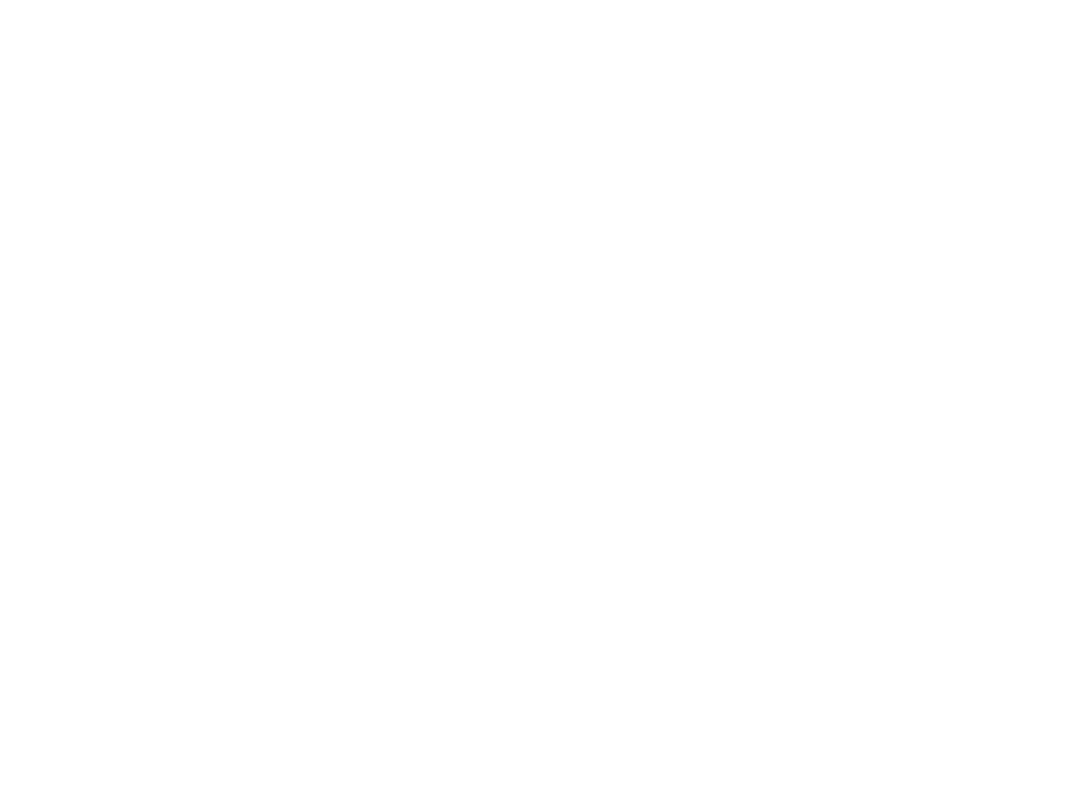

In [83]:
fig = plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


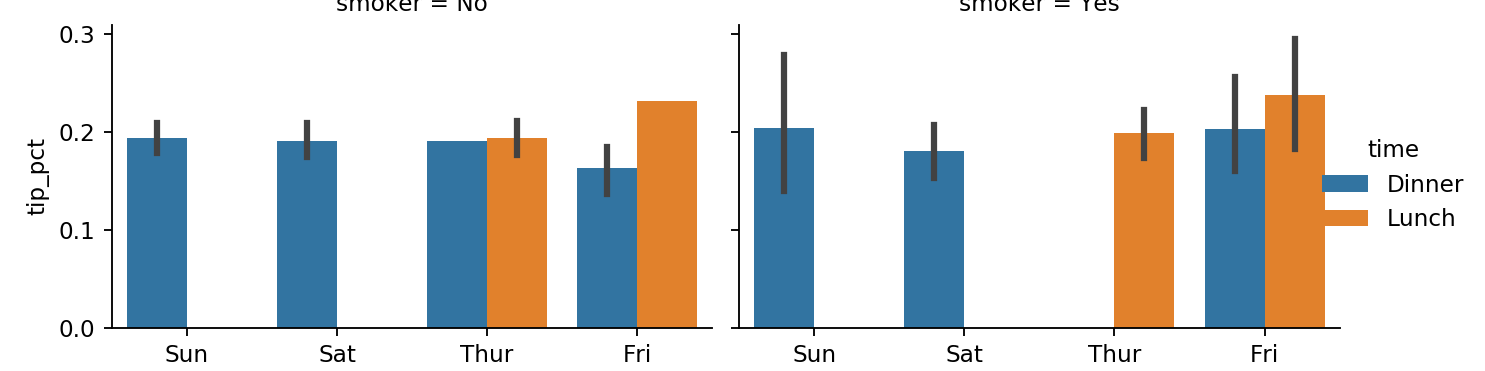

In [84]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

Em vez de agrupar por 'tempo' usando cores de barras diferentes dentro de uma faceta, também podemos expandir a grade de faceta adicionando uma linha por valor de tempo.

<IPython.core.display.Javascript object>


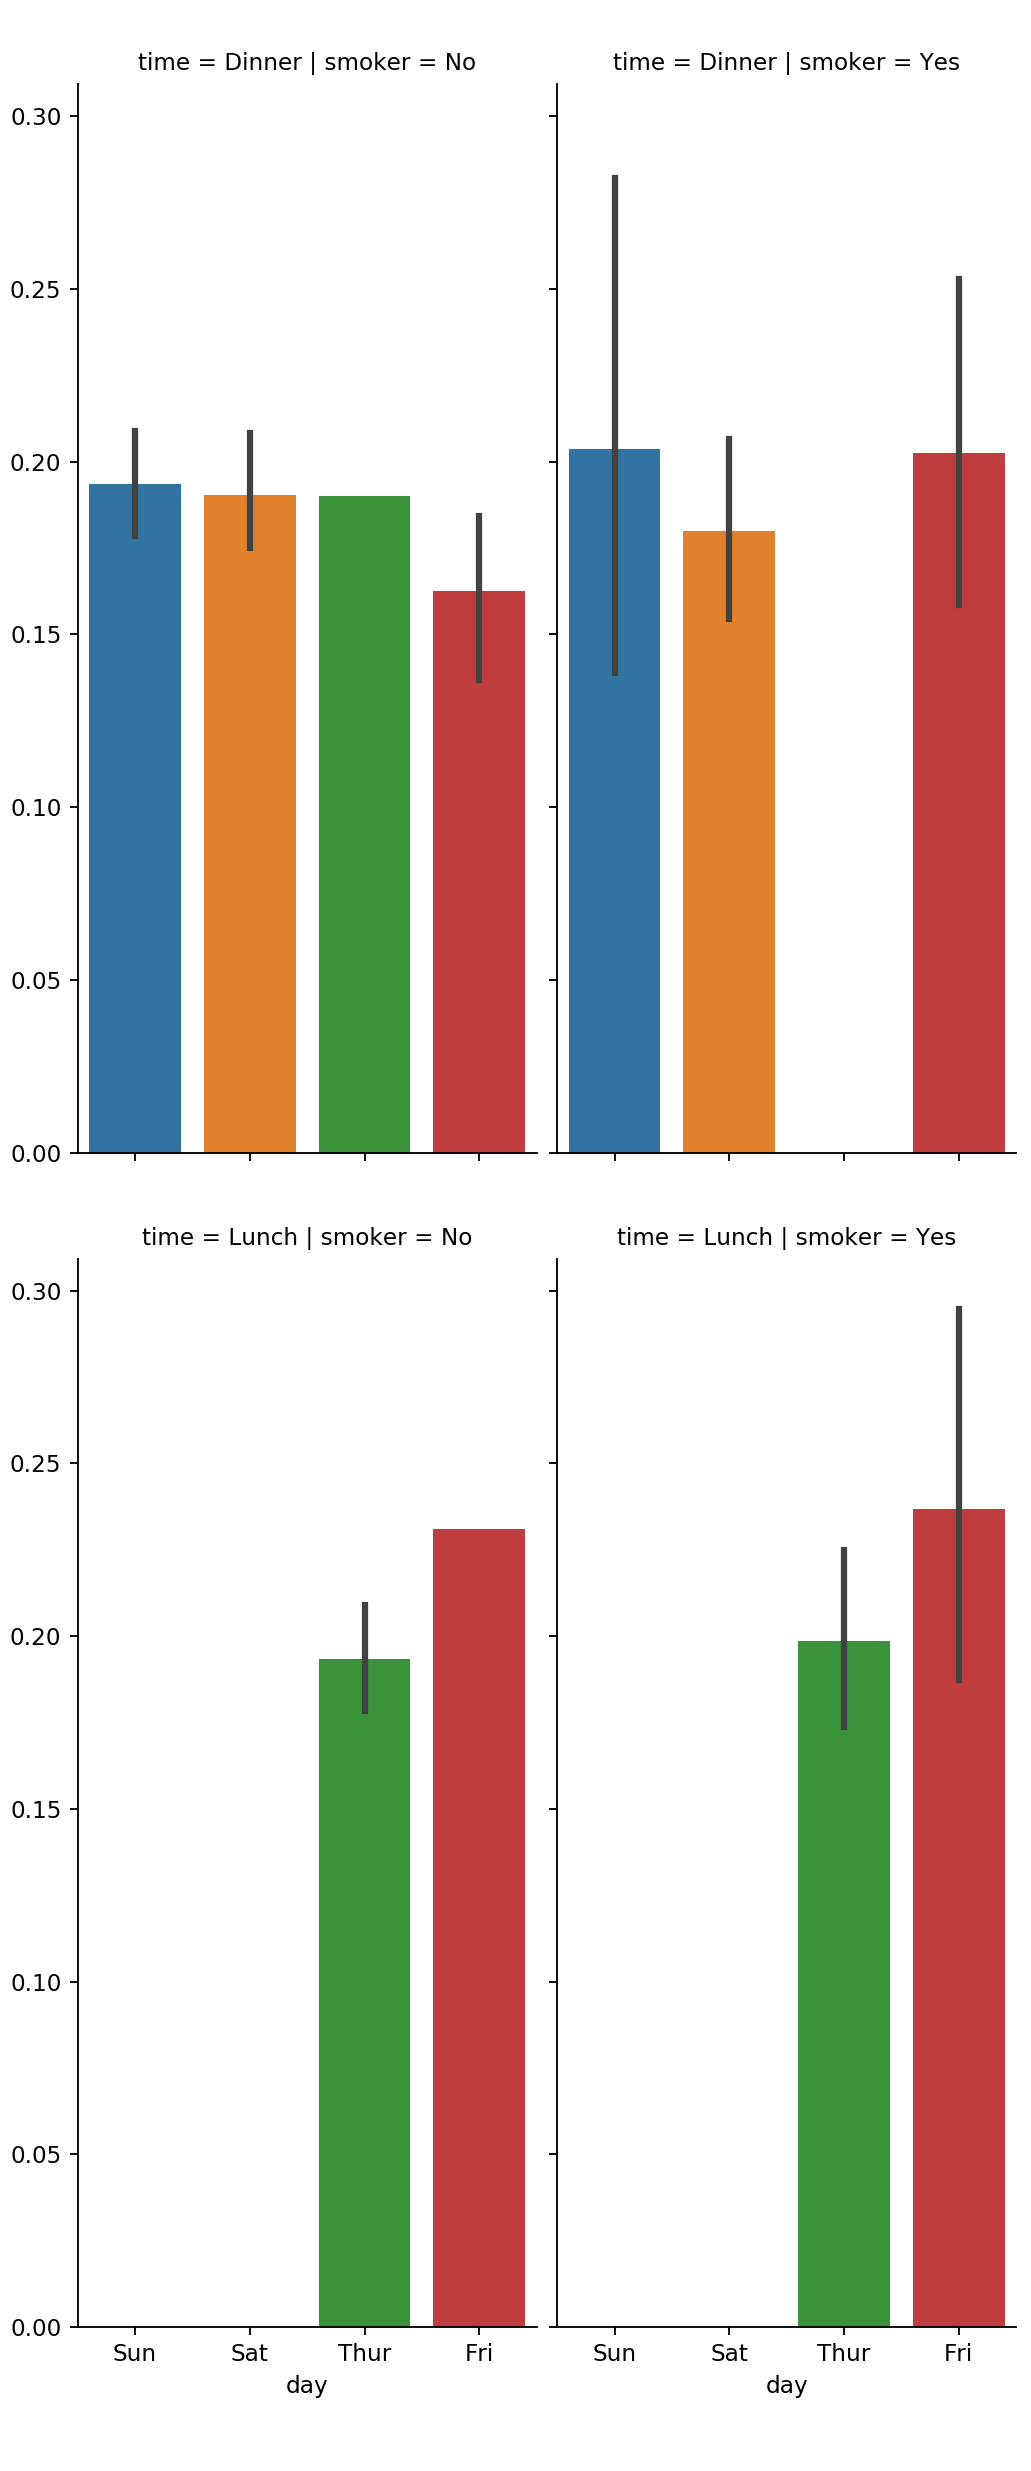

In [50]:
sns.factorplot(x='day', y='tip_pct', row='time',
col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

**factorplot** suporta outros tipos de figura que podem ser úteis dependendo de quem você está
tentando exibir. Por exemplo, gráficos de caixa (que mostram a mediana, quartis e outliers)
pode ser um tipo de visualização eficaz.

<IPython.core.display.Javascript object>


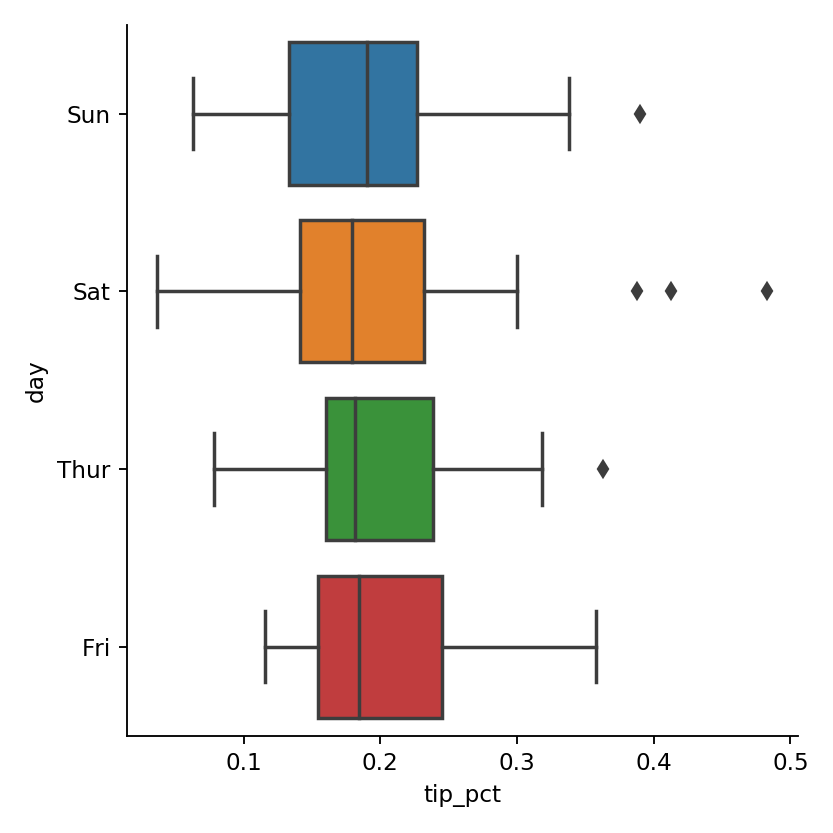

In [51]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

Mais sobre o [Seaborn](https://seaborn.pydata.org/)